### 长短期记忆网络（LSTM）
* 输入门、忘记门和输出门
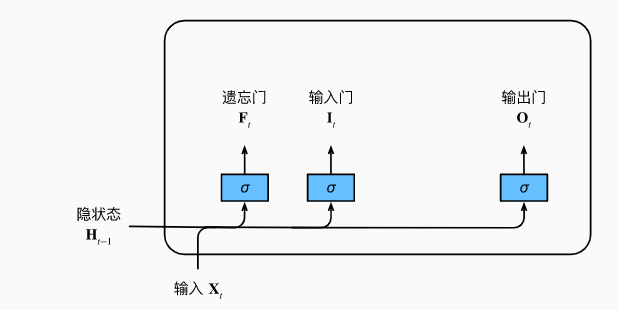、
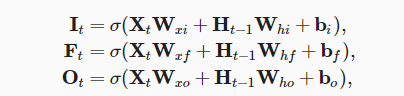
* 候选记忆元
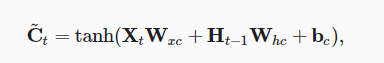
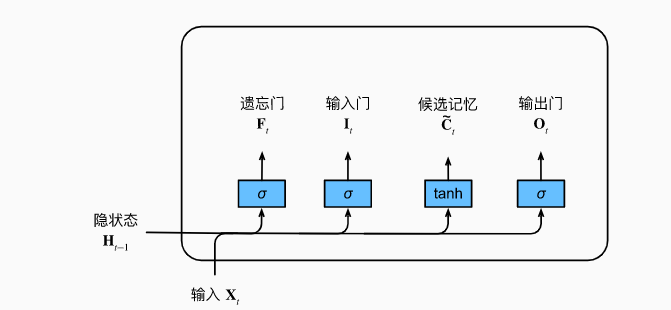
* 记忆元
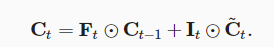
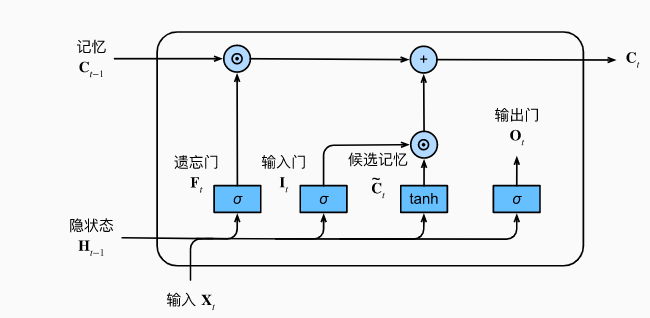
* 隐状态
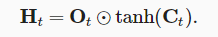
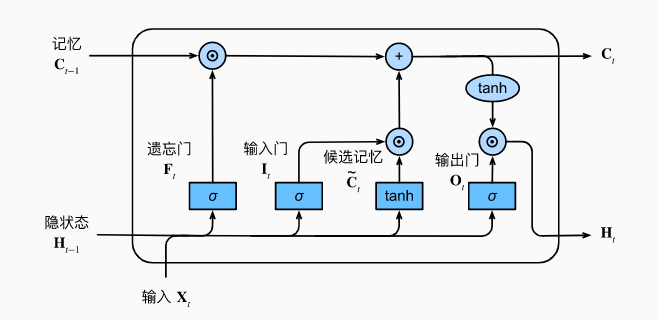

In [2]:
# 从零开始实现
import torch
from torch import nn
import dltools

batch_size, num_steps = 32, 35
train_iter, vocab = dltools.load_data_time_machine(batch_size, num_steps)


In [3]:
# 初始化模型参数
def get_lstm_params(vocab_size, num_hiddens, device):
    num_inputs = num_outputs = vocab_size

    def normal(shape):
        return torch.randn(size=shape, device=device)*0.01

    def three():
        return (normal((num_inputs, num_hiddens)),
                normal((num_hiddens, num_hiddens)),
                torch.zeros(num_hiddens, device=device))

    W_xi, W_hi, b_i = three()  # 输入门参数
    W_xf, W_hf, b_f = three()  # 遗忘门参数
    W_xo, W_ho, b_o = three()  # 输出门参数
    W_xc, W_hc, b_c = three()  # 候选记忆元参数
    # 输出层参数
    W_hq = normal((num_hiddens, num_outputs))
    b_q = torch.zeros(num_outputs, device=device)
    # 附加梯度
    params = [W_xi, W_hi, b_i, W_xf, W_hf, b_f, W_xo, W_ho, b_o, W_xc, W_hc,
              b_c, W_hq, b_q]
    for param in params:
        param.requires_grad_(True)
    return params

In [4]:
# 定义模型
def init_lstm_state(batch_size, num_hiddens, device):
    return (torch.zeros((batch_size, num_hiddens), device=device),
            torch.zeros((batch_size, num_hiddens), device=device))

def lstm(inputs, state, params):
    [W_xi, W_hi, b_i, W_xf, W_hf, b_f, W_xo, W_ho, b_o, W_xc, W_hc, b_c,
     W_hq, b_q] = params
    (H, C) = state
    outputs = []
    for X in inputs:
        I = torch.sigmoid((X @ W_xi) + (H @ W_hi) + b_i)
        F = torch.sigmoid((X @ W_xf) + (H @ W_hf) + b_f)
        O = torch.sigmoid((X @ W_xo) + (H @ W_ho) + b_o)
        C_tilda = torch.tanh((X @ W_xc) + (H @ W_hc) + b_c)
        C = F * C + I * C_tilda
        H = O * torch.tanh(C)
        Y = (H @ W_hq) + b_q
        outputs.append(Y)
    return torch.cat(outputs, dim=0), (H, C)

perplexity 14.5, 6881.7 tokens/sec on cpu
time traveller at at at at at at at at at at at at at at at at a
traveller at at at at at at at at at at at at at at at at a


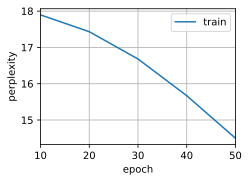

In [5]:
# 训练和预测
vocab_size, num_hiddens, device = len(vocab), 256, dltools.try_gpu()
num_epochs, lr = 50, 1
model = dltools.RNNModelScratch(len(vocab), num_hiddens, device, get_lstm_params,
                            init_lstm_state, lstm)
dltools.train_ch8(model, train_iter, vocab, lr, num_epochs, device)

In [ ]:
# 简洁版实现
num_inputs = vocab_size
lstm_layer = nn.LSTM(num_inputs, num_hiddens)
model = dltools.RNNModel(lstm_layer, len(vocab))
model = model.to(device)
dltools.train_ch8(model, train_iter, vocab, lr, num_epochs, device)